In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("FatihEvFiyatları.csv", sep=";")

# İlk 5 satırı görüntüleme
print(df.head())

# Temel istatistiksel özet
print(df.describe())

# Veri tiplerini kontrol etme
print(df.info())

   alan  odasayisi  binayasi    fiyat
0    55          2         4  1730000
1    35          1         7   755000
2   160          4         9  3450000
3    30          1         9   800000
4    50          3         8  1250000
             alan  odasayisi   binayasi         fiyat
count   39.000000  39.000000  39.000000  3.900000e+01
mean    95.435897   3.051282   5.051282  2.542179e+06
std     55.171882   1.050031   4.236115  1.495892e+06
min     22.000000   1.000000   0.000000  6.500000e+05
25%     50.000000   2.000000   0.500000  1.245000e+06
50%     70.000000   3.000000   6.000000  2.250000e+06
75%    152.500000   4.000000   8.000000  3.825000e+06
max    197.000000   5.000000  18.000000  5.500000e+06
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   alan       39 non-null     int64
 1   odasayisi  39 non-null     int64
 2   binayasi   39 non-null     

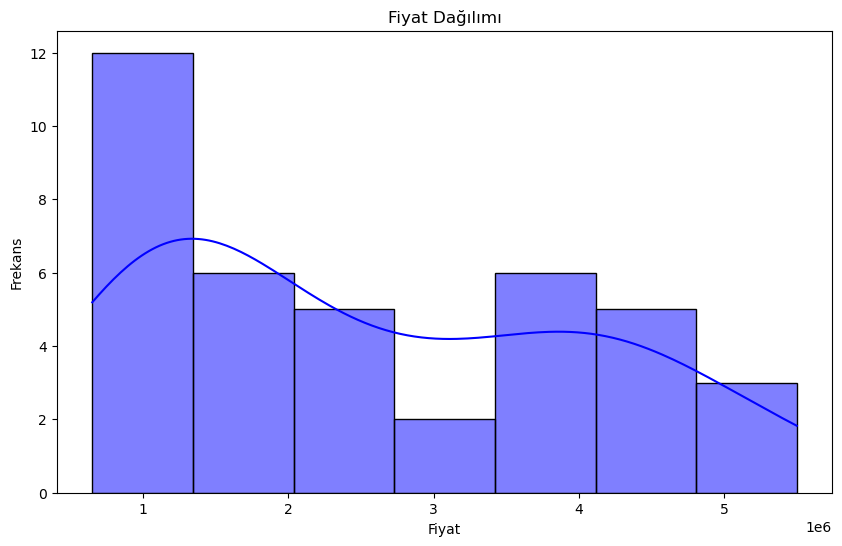

In [3]:
# Fiyatların dağılımını gösteren histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['fiyat'], kde=True, color='blue')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')
plt.show()

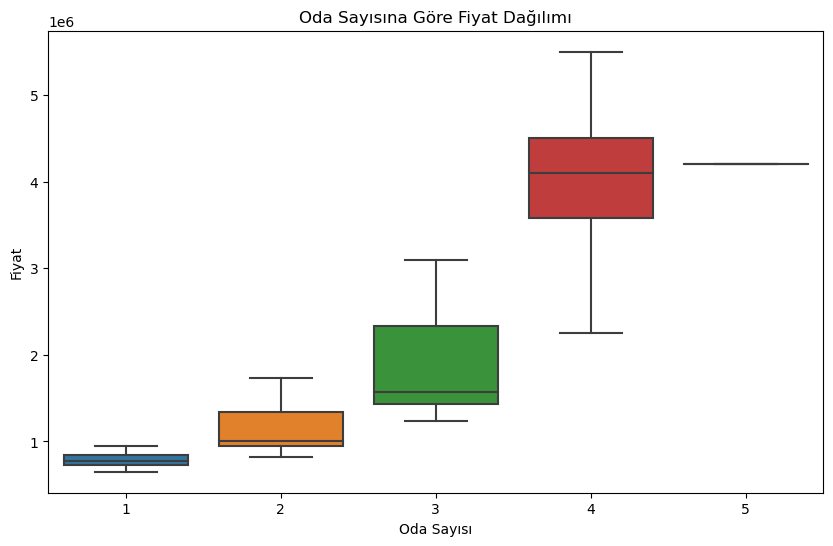

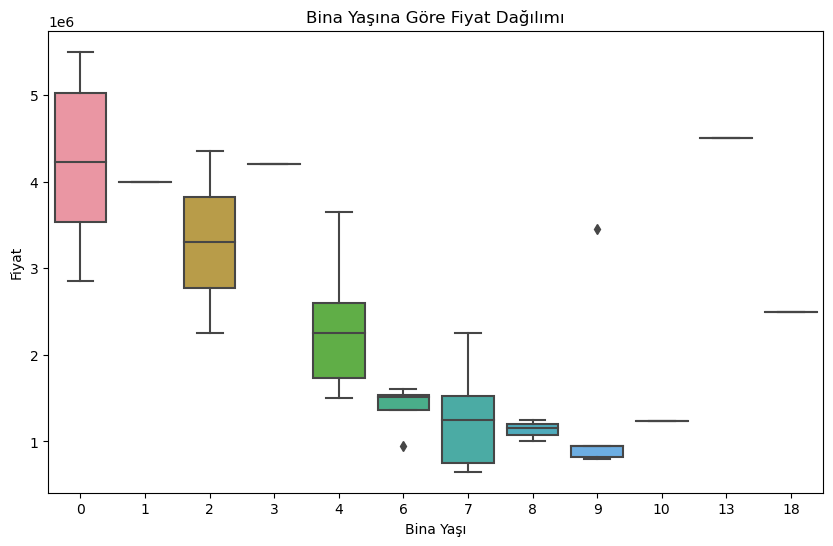

In [4]:
# Oda sayısına göre fiyatların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='odasayisi', y='fiyat', data=df)
plt.title('Oda Sayısına Göre Fiyat Dağılımı')
plt.xlabel('Oda Sayısı')
plt.ylabel('Fiyat')
plt.show()

# Binayaşına göre fiyatların kutu grafiği
plt.figure(figsize=(10, 6))
sns.boxplot(x='binayasi', y='fiyat', data=df)
plt.title('Bina Yaşına Göre Fiyat Dağılımı')
plt.xlabel('Bina Yaşı')
plt.ylabel('Fiyat')
plt.show()

In [5]:
# Yeni özellikler türetme
df['odasayi_binayasi'] = df['odasayisi'] * df['binayasi']
df['log_fiyat'] = np.log(df['fiyat'])

# Yeni özellikleri görüntüleme
print(df[['odasayi_binayasi', 'log_fiyat']].head())

   odasayi_binayasi  log_fiyat
0                 8  14.363632
1                 7  13.534473
2                36  15.053885
3                 9  13.592367
4                24  14.038654


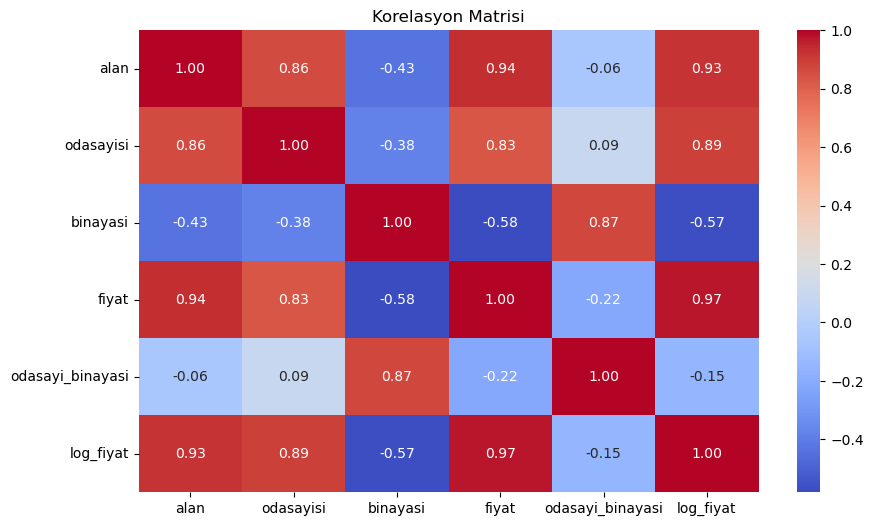

In [6]:
# Korelasyon matrisini oluşturma
correlation_matrix = df.corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasyon Matrisi')
plt.show()

In [7]:
# Linear Regression Modeli
X = df[['alan', 'odasayisi', 'binayasi', 'odasayi_binayasi']]  # Özellikler
y = df['fiyat']  # Hedef değişken

linear_reg = LinearRegression()
linear_reg.fit(X, y)

# Random Forest Modeli
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X, y)

# Çapraz doğrulama sonuçları
cv_scores_linear = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores_rf = cross_val_score(rf_reg, X, y, cv=5, scoring='neg_mean_squared_error')

print(f"Linear Regression Cross-validation MSE: {-cv_scores_linear.mean():.2f}")
print(f"Random Forest Cross-validation MSE: {-cv_scores_rf.mean():.2f}")

Linear Regression Cross-validation MSE: 237099931056.63
Random Forest Cross-validation MSE: 314750302223.21


In [8]:
# Tahminler ve Hata Metrikleri
linear_pred = linear_reg.predict(X)
rf_pred = rf_reg.predict(X)

print("Linear Regression MAE:", mean_absolute_error(y, linear_pred))
print("Random Forest MAE:", mean_absolute_error(y, rf_pred))

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y, linear_pred)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y, rf_pred)))

Linear Regression MAE: 320014.0088749428
Random Forest MAE: 151508.97435897434
Linear Regression RMSE: 422077.0793031676
Random Forest RMSE: 213440.243093459


In [12]:
# Tahmin Fonksiyonu
def predict():
    try:
        # Kullanıcı girdilerini al
        alan = alan_entry.get()
        odasayisi = odasayisi_entry.get()
        binayasi = binayasi_entry.get()

        # Girdi türlerini kontrol et
        if not alan.replace('.', '', 1).isdigit() or not odasayisi.isdigit() or not binayasi.isdigit():
            raise ValueError("Lütfen geçerli sayılar giriniz.")
        
        # Sayıya çevir
        alan = float(alan)
        odasayisi = int(odasayisi)
        binayasi = int(binayasi)
        
        # Tahmin yap
        fiyat_tahmin = rf_reg.predict([[alan, odasayisi, binayasi, odasayisi * binayasi]])
        messagebox.showinfo("Sonuç", f"Tahmin Edilen Fiyat: {fiyat_tahmin[0]:.2f} TL")
    except ValueError as e:
        messagebox.showerror("Hata", str(e))

# Tkinter arayüzü
root = tk.Tk()
root.title("Ev Fiyatı Tahmin Aracı")

# Girdi alanları
ttk.Label(root, text="Alan (m²):").grid(column=0, row=0)
alan_entry = ttk.Entry(root)
alan_entry.grid(column=1, row=0)

ttk.Label(root, text="Oda Sayısı:").grid(column=0, row=1)
odasayisi_entry = ttk.Entry(root)
odasayisi_entry.grid(column=1, row=1)

ttk.Label(root, text="Bina Yaşı:").grid(column=0, row=2)
binayasi_entry = ttk.Entry(root)
binayasi_entry.grid(column=1, row=2)

# Tahmin et butonu
ttk.Button(root, text="Tahmin Et", command=predict).grid(column=0, row=3, columnspan=2)

# Arayüzü başlat
root.mainloop()